### Setup Matplotlib

In [1]:
%matplotlib inline

### Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.covariance import EmpiricalCovariance
from sklearn.pipeline import Pipeline

### Open Data Files

In [57]:
df_train = pd.read_csv('../data/train.csv')
df_target = df_train['TARGET']
df_train = df_train.drop(['TARGET', 'ID'], axis=1)

df_test = pd.read_csv('../data/test.csv')
df_test = df_test.drop(['ID'], axis=1)

df_sample = pd.read_csv('../data/sample_submission.csv')
df_sample = df_sample.drop(['ID'], axis=1)

### Visualize Data

In [75]:
# train.csv
#var3 = -999999 or -infinity
descriptive = df_train.describe()
descriptive.loc['unique'] = [len(df_train[col].unique()) for col in df_train.columns]
pd.options.display.max_columns = descriptive.shape[1]
descriptive
df[3, 'var3']=0


NameError: name 'df' is not defined

In [72]:
#test.csv
descriptive2 = df_test.describe()
descriptive2.loc['unique'] = [len(df_test[col].unique()) for col in df_test.columns]
pd.options.display.max_columns = descriptive2.shape[1]
#df_train.at[4,'var3'] = 0 # attempt to change value of row 4, col var3
descriptive2

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte

In [33]:
#sample_submission.csv
descriptive3 = df_sample.describe()
descriptive3.loc['unique'] = [len(df_sample[col].unique()) for col in df_sample.columns]
pd.options.display.max_columns = descriptive3.shape[1]
#df_train.at[4,'var3'] = 0 # attempt to change value of row 4, col var3
descriptive3

,ID,TARGET
count,75818.000000,75818.0
mean,75874.830581,0.0
std,43882.370827,0.0
min,2.000000,0.0
25%,37840.250000,0.0
50%,75810.000000,0.0
75%,113996.500000,0.0
max,151837.000000,0.0
unique,75818.000000,1.0


Text(0, 0.5, '$\\sigma^2$')

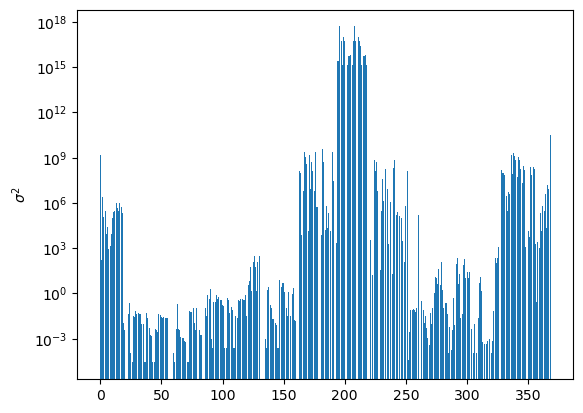

In [34]:
plt.bar(range(df_train.shape[1]), df_train.var().values)
plt.gca().set_yscale('log')
plt.ylabel('$\sigma^2$')

Text(0, 0.5, 'unique')

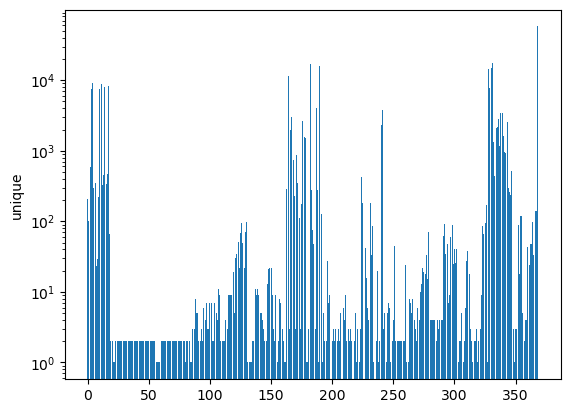

In [35]:
plt.bar(range(len(descriptive.T['unique'])), descriptive.T['unique'])
plt.gca().set_yscale('log')
plt.ylabel('unique')

In [38]:
# column correlations
r = df_train.corr().abs()
plt.imshow(r, interpolation='nearest')

Columns with s^2 <= 0.000000
['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']


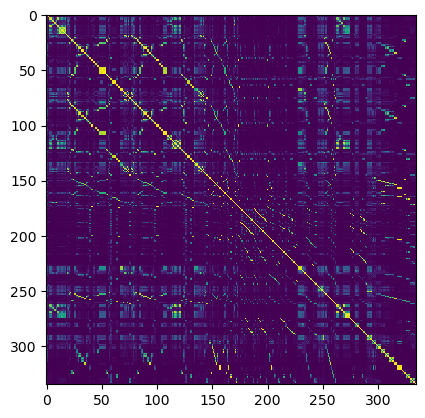

In [40]:
# column correlations
r = df_train.corr().abs()
plt.imshow(r, interpolation='nearest')

In [43]:
# drop perfectly correlated columns
corr_cols = []
r_thresh = 1.0

for i in range(r.shape[0]-1):
    for j in range(i+1, r.shape[1]):
        if r.values[i, j] >= r_thresh and r.columns[j] not in corr_cols:
            corr_cols.append(r.columns[j])
    
print ('Columns with r >= %f' % r_thresh)
print (corr_cols)

df_train = df_train.drop(corr_cols, axis=1)
df_test = df_test.drop(corr_cols, axis=1)

Columns with r >= 1.000000
['ind_var29_0', 'num_var6_0', 'num_var29_0', 'ind_var29', 'num_var8', 'ind_var13_medio', 'num_meses_var13_medio_ult3', 'ind_var18', 'num_var20', 'ind_var26', 'ind_var25', 'ind_var32', 'ind_var34', 'ind_var37', 'ind_var39', 'num_var29', 'num_var13_medio', 'num_var18', 'delta_imp_amort_var18_1y3', 'num_var26', 'num_var25', 'num_var32', 'num_var34', 'delta_imp_amort_var34_1y3', 'num_var37', 'num_var39', 'saldo_var29', 'saldo_medio_var13_medio_ult1', 'delta_num_aport_var13_1y3', 'delta_num_aport_var17_1y3', 'delta_num_reemb_var13_1y3', 'num_reemb_var13_ult1', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'imp_reemb_var33_ult1', 'delta_num_trasp_var17_in_1y3', 'num_trasp_var17_in_ult1', 'delta_num_trasp_var17_out_1y3', 'num_trasp_var17_out_ult1', 'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3', 'num_reemb_var17_hace3', 'num_var7_emit_ult1']


In [45]:
X_train = df_train.values
X_test = df_test.values
y_train = df_target.values

Text(0.5, 0, 'Component (inclusive)')

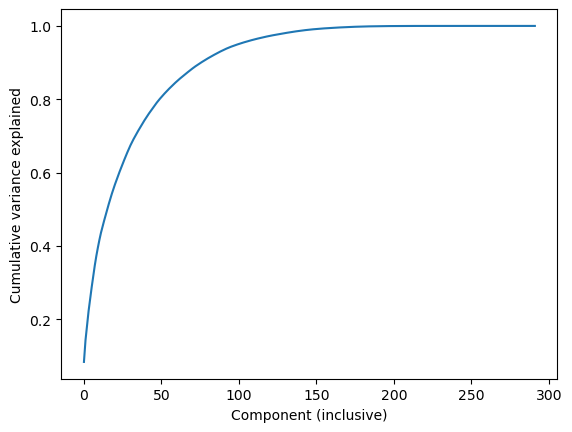

In [46]:
# pca -- seems to be about 100-150 dims
pca = Pipeline([
        ('std', StandardScaler()),
        ('pca', PCA()),
    ])

pca = pca.fit(X_train)
explained_variance_ratio = pca.steps[-1][-1].explained_variance_ratio_

plt.plot(np.cumsum(explained_variance_ratio))
plt.ylabel('Cumulative variance explained')
plt.xlabel('Component (inclusive)')

In [47]:
# pca -- see if loadings make any sense
components = pca.steps[-1][-1].components_
n_components = 5
n_loadings = 5
loadings = ''

for i in range(n_components):
    sort_idx = np.argsort(np.abs(components[i, :]))[::-1][:n_components]
    loadings += 'PC%d: ' % i
    for j in sort_idx:
        loadings += '%.2f*%s + '% (components[i, j], df_train.columns[j])
    loadings += '...\n\n'
print (loadings)

PC0: 0.15*num_op_var39_ult3 + 0.15*num_var4 + 0.15*num_var35 + 0.15*num_op_var39_ult1 + 0.15*num_op_var41_ult3 + ...

PC1: 0.20*num_var30_0 + 0.19*ind_var13_0 + 0.18*num_var13_0 + 0.18*ind_var13 + 0.18*num_var13 + ...

PC2: 0.20*ind_var31_0 + 0.20*ind_var31 + 0.17*num_var31 + 0.17*num_var31_0 + 0.16*ind_var44_0 + ...

PC3: -0.18*ind_var24 + -0.18*num_var24 + -0.17*ind_var24_0 + -0.17*num_var24_0 + -0.17*saldo_var12 + ...

PC4: 0.24*num_var1 + 0.24*ind_var1 + 0.24*num_var40 + 0.24*ind_var40 + 0.23*saldo_var40 + ...




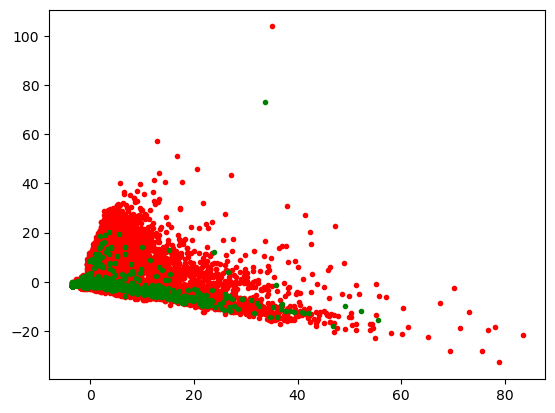

In [48]:
# pca -- see if any separability in projections
unsatisfied = y_train == 0
satisfied = y_train == 1

X_pca = pca.transform(X_train)

plt.plot(X_pca[unsatisfied, 0], X_pca[unsatisfied, 1], 'r.')
plt.plot(X_pca[satisfied, 0], X_pca[satisfied, 1], 'g.')

Text(0, 0.5, '$M^2$')

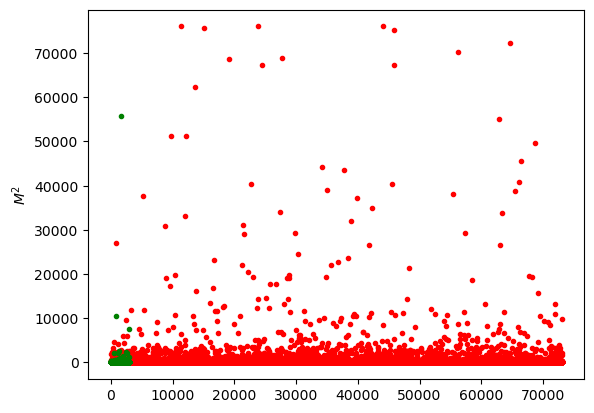

In [49]:
# potential outliers?
ec = EmpiricalCovariance()
ec = ec.fit(X_train)
m2 = ec.mahalanobis(X_train)

plt.plot(m2[unsatisfied], 'r.')
plt.plot(m2[satisfied], 'g.')
plt.ylabel('$M^2$')

Potential outliers 104/76020


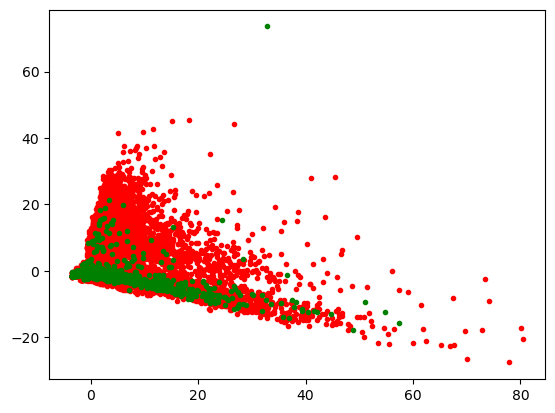

In [52]:
# pca -- rerun without outliers
inliers = m2 < 10000
print('Potential outliers %d/%d' % (X_train.shape[0]-np.sum(inliers), X_train.shape[0]))

X_train_in = X_train[inliers, :]
y_train_in = y_train[inliers]

pca = pca.fit(X_train_in)

unsatisfied = y_train_in == 0
satisfied = y_train_in == 1

X_pca = pca.transform(X_train_in)

plt.plot(X_pca[unsatisfied, 0], X_pca[unsatisfied, 1], 'r.')
plt.plot(X_pca[satisfied, 0], X_pca[satisfied, 1], 'g.')

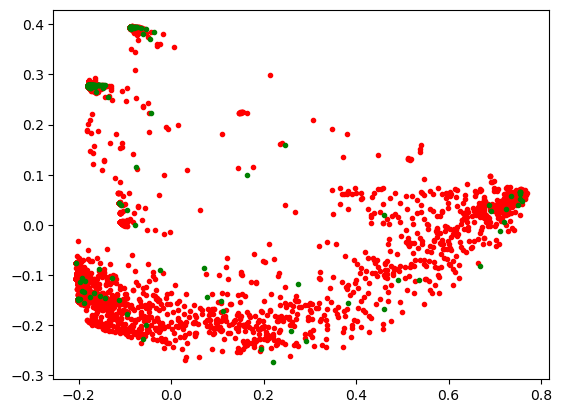

In [51]:
# kpca -- try with a smaller set of data to see if it becomes more easily separable
np.random.seed(0)

sample_pct = 0.05
sample_n = int(sample_pct * X_train.shape[0])
sample_idx = np.random.permutation(range(X_train.shape[0]))[:sample_n]

X_train_sub = X_train[sample_idx, :]
y_train_sub = y_train[sample_idx]

# pca -- seems to be about 100-150 dims
kpca = Pipeline([
        ('std', StandardScaler()),
        ('pca', KernelPCA(kernel='rbf')),
    ])
kpca = kpca.fit(X_train_sub)

unsatisfied = y_train_sub == 0
satisfied = y_train_sub == 1

X_kpca = kpca.transform(X_train_sub)

plt.plot(X_kpca[unsatisfied, 0], X_kpca[unsatisfied, 1], 'r.')
plt.plot(X_kpca[satisfied, 0], X_kpca[satisfied, 1], 'g.')